# Applying Linear Regression

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel('avgtemplong.xlsx')
print(df)

   month  year       temp  Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  \
0    Jan  2014  15.445161         NaN         NaN         NaN         NaN   
1    Feb  2014  17.523214         NaN         NaN         NaN         NaN   
2    Mar  2014  23.506452         NaN         NaN         NaN         NaN   
3    Apr  2014  29.285000         NaN         NaN         NaN         NaN   
4    May  2014  31.911290         NaN         NaN         NaN         NaN   
5    Jun  2014  33.560000         NaN         NaN         NaN         NaN   
6    Jul  2014  30.496774         NaN         NaN         NaN         NaN   
7    Aug  2014  29.983871         NaN         NaN         NaN         NaN   
8    Sep  2014  28.960000         NaN         NaN         NaN         NaN   
9    Oct  2014  25.838710         NaN         NaN         NaN         NaN   
10   Nov  2014  20.666667         NaN         NaN         NaN         NaN   
11   Dec  2014  14.997903         NaN         NaN         NaN         NaN   

In [95]:
month  = np.array(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
for val in range(0,12):
    df = df.replace(to_replace = month[val], value = val+1, regex = True)
print (df.head(48),'\n')

    month  year       temp  Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  \
0       1  2014  15.445161         NaN         NaN         NaN         NaN   
1       2  2014  17.523214         NaN         NaN         NaN         NaN   
2       3  2014  23.506452         NaN         NaN         NaN         NaN   
3       4  2014  29.285000         NaN         NaN         NaN         NaN   
4       5  2014  31.911290         NaN         NaN         NaN         NaN   
5       6  2014  33.560000         NaN         NaN         NaN         NaN   
6       7  2014  30.496774         NaN         NaN         NaN         NaN   
7       8  2014  29.983871         NaN         NaN         NaN         NaN   
8       9  2014  28.960000         NaN         NaN         NaN         NaN   
9      10  2014  25.838710         NaN         NaN         NaN         NaN   
10     11  2014  20.666667         NaN         NaN         NaN         NaN   
11     12  2014  14.997903         NaN         NaN         NaN  

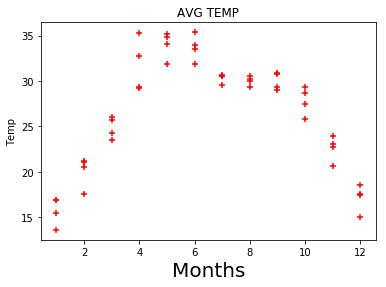

In [96]:
plt.figure()
fig = plt.scatter(df.month, df.temp, color = 'red',marker = '+')
plt.xlabel('Months', fontsize = 20)
plt.ylabel('Temp')
plt.title('AVG TEMP')
plt.show()


In [97]:
idx = pd.IndexSlice
x = df.loc[idx[:],'month']
x1 = x.values.reshape(-1,1) #converting into array by doing reshaping
y = df.loc[idx[:],'temp']
y1 = y.values.reshape(-1,1)

In [98]:
x_train = x1[0:36,:]
y_train = y1[0:36,:]
x_test = x1[36:48,:]
y_test = y1[36:48,:]

In [99]:
from sklearn.linear_model import LinearRegression
regtemp = LinearRegression()
regtemp.fit( x_train, y_train)
y_predict = regtemp.predict(x_test)


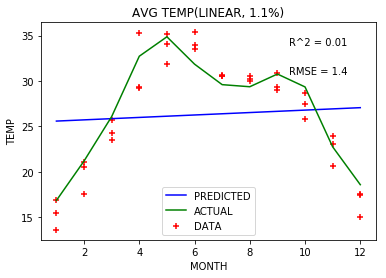

<Figure size 432x288 with 0 Axes>

In [100]:
plt.scatter(x_train,y_train,color='red',marker = '+', label = 'DATA')
plt.plot(x_test,y_predict,color = 'blue',label = 'PREDICTED')
plt.plot(x_test,y_test,color ='green',label = 'ACTUAL')
plt.title('AVG TEMP(LINEAR, 1.1%)')
plt.xlabel('MONTH')
plt.ylabel('TEMP')
plt.figtext(.7, .8,"R^2 = 0.01")
plt.figtext(.7, .7,"RMSE = 1.4")
plt.legend()
plt.show()
plt.savefig("C:/Users/user/Desktop/templinear1.png",transparent = True, bbox_inches ="tight")

In [101]:
regtemp.coef_

array([[0.13435496]])

In [102]:
regtemp.intercept_

array([25.44183283])

In [103]:
from sklearn.metrics import r2_score
r2_score(x_test,y_test)
#R-squared is a statistical measure of how close the data are to the fitted
#regression line. It is also known as the coefficient of determination, or 
#the coefficient of multiple determination for multiple regression.

-37.67748627150476

In [104]:
print('Varience score:%2f' %regtemp.score(x_test,y_test))

Varience score:-0.011546


In [105]:
from sklearn.metrics import explained_variance_score
variance = explained_variance_score(y_test,y_predict, multioutput='uniform_average')
variance

0.002934661598964383

In [106]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_predict)

31.804953591403688

In [107]:
import numpy as np
np.mean(((y_test-y_predict)**2/12)**.5)

1.4427731681248537

# SVR (SUPPORT VECTOR REGRESSOR)

# SVR LINEAR

In [108]:
from sklearn.svm import SVR

svm_lin=SVR(kernel='linear')
svm_lin.fit(x_train,y_train.ravel())
y_pred_lin=svm_lin.predict(x_test)

In [109]:
accuracy=svm_lin.score(x_test,y_test)
print("Accuracy of the Support Vector Regression model is : "+str(accuracy*100)+" %")

print('Coefficients: \n', svm_lin.coef_)
print('Intercept: \n', svm_lin.intercept_)

#print("Mean squared error: %.2f", mean_squared_error(y_test,svr_pred))

print('Variance score: %.2f',r2_score(y_test,y_pred_lin))



Accuracy of the Support Vector Regression model is : -11.122977241701237 %
Coefficients: 
 [[0.]]
Intercept: 
 [28.86]
Variance score: %.2f -0.11122977241701237


In [110]:
from sklearn.metrics import mean_squared_error
print('MeanSquareError: %.2f',mean_squared_error(y_test,y_pred_lin))
print('R2 score: %.2f',svm_lin.score(x_test,y_test))

MeanSquareError: %.2f 34.939203772810465
R2 score: %.2f -0.11122977241701237


In [111]:
import numpy as np
np.mean(((y_test-y_pred_lin)**2/12)**.5)

1.3320036826828066

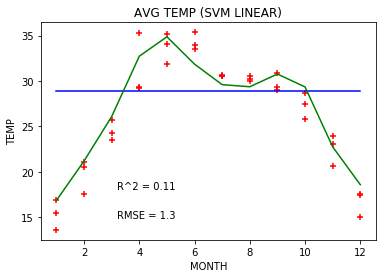

In [112]:
plt.scatter(x_train,y_train,  color='red', marker = '+')
plt.plot(x_test,y_pred_lin, color='blue')
plt.plot(x_test,y_test, color='green')
plt.title('AVG TEMP (SVM LINEAR)')
plt.xlabel('MONTH')
plt.ylabel('TEMP')
plt.figtext(.3, .3,"R^2 = 0.11")
plt.figtext(.3, .2,"RMSE = 1.3")
plt.show()

# SVM POLY

In [113]:
from sklearn.svm import SVR
svm_poly = SVR(kernel = 'poly',C = 10, gamma = 1)
svm_poly.fit(x_train,y_train.ravel())
y_pred_poly = svm_poly.predict(x_test)

In [114]:
import numpy as np
np.mean(((y_test-y_pred_poly)**2/12)**.5)

1.6097592158089258

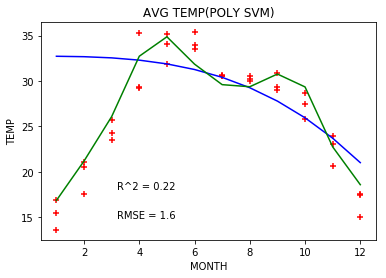

In [115]:
plt.scatter(x_train,y_train,color='red',marker = '+')
plt.plot(x_test,y_pred_poly,color = 'blue')
plt.plot(x_test,y_test,color ='green')
plt.title('AVG TEMP(POLY SVM)')
plt.xlabel('MONTH')
plt.ylabel('TEMP')
plt.figtext(.3, .3,"R^2 = 0.22")
plt.figtext(.3, .2,"RMSE = 1.6")
plt.show()

In [116]:
from sklearn.metrics import mean_squared_error
print('MeanSquareError: %.2f',mean_squared_error(y_test,y_pred_poly))
print('R2 score: %.2f',svm_poly.score(x_test,y_test))

MeanSquareError: %.2f 38.63292681282194
R2 score: %.2f -0.22870740699085992


# SVM RBF

In [117]:
from sklearn.svm import SVR
svm_rbf = SVR(kernel = 'rbf',C = 10, gamma = 10)
svm_rbf.fit(x_train,y_train.ravel())
y_pred_rbf = svm_rbf.predict(x_test)

In [118]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
reg_rbf = SVR(kernel= 'rbf')
C = [100 , 10 ,1,1000]
gamma = [0.001 , 0.1 , 1,10]
epsilon = [0.01, 0.1, 1,10]
parameter = {"C": C, "gamma": gamma, "epsilon": epsilon}
gs = GridSearchCV(reg_rbf, parameter, scoring= 'r2')
gs.fit(x_train, y_train)
print(' Best Estimator :\n%s'%gs.best_estimator_)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

 Best Estimator :
SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

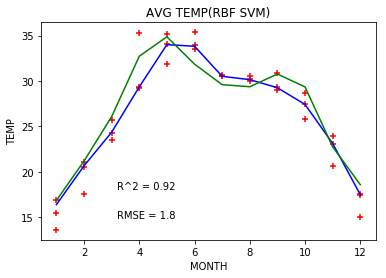

In [119]:
plt.scatter(x_train,y_train,color='red',marker = '+')
plt.plot(x_test,y_pred_rbf,color = 'blue')
plt.plot(x_test,y_test,color ='green')
plt.title('AVG TEMP(RBF SVM)')
plt.xlabel('MONTH')
plt.ylabel('TEMP')
plt.figtext(.3, .3,"R^2 = 0.92")
plt.figtext(.3, .2,"RMSE = 1.8")
plt.show()

In [120]:
from sklearn.metrics import mean_squared_error
print('MeanSquareError: %.2f',mean_squared_error(y_test,y_pred_rbf))
print('R2 score: %.2f',svm_rbf.score(x_test,y_test))

MeanSquareError: %.2f 2.35512947034402
R2 score: %.2f 0.925095889352247


In [121]:
import numpy as np
np.mean(((y_test-y_pred_rbf)**2/12)**.5)

1.8528437353684224

# ALL SVM

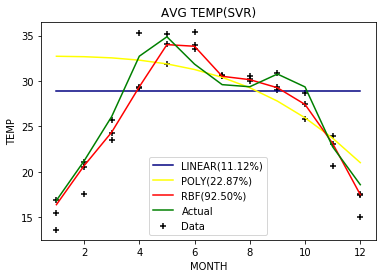

In [122]:
plt.scatter(x_train,y_train,color='black',marker = '+', label = 'Data')
plt.plot(x_test,y_pred_lin,color = 'navy', label = 'LINEAR(11.12%)')
plt.plot(x_test,y_pred_poly,color = 'yellow',label = 'POLY(22.87%)')
plt.plot(x_test,y_pred_rbf,color = 'red',label = 'RBF(92.50%)')
plt.plot(x_test,y_test,color ='green', label = 'Actual')
plt.title('AVG TEMP(SVR)')
plt.xlabel('MONTH')
plt.ylabel('TEMP')
plt.legend()
plt.show()

In [123]:
from sklearn.metrics import explained_variance_score
variance = explained_variance_score(y_test,y_pred_rbf, multioutput='uniform_average')
variance

0.9373546774894733

# LOGISTIC REGRESSION


In [124]:
from sklearn import preprocessing
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
y_train_new = lab_enc.fit_transform(y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [125]:
from sklearn.linear_model import LogisticRegression
reglogtemp = LogisticRegression()
reglogtemp.fit(x_train,y_train_new.ravel())
y_pred_log = reglogtemp.predict(x_test)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel('avgtemplogisticlong.xlsx')
print(df)

   month  year  temp
0    Jan  2014    15
1    Feb  2014    18
2    Mar  2014    24
3    Apr  2014    29
4    May  2014    32
5    Jun  2014    34
6    Jul  2014    30
7    Aug  2014    30
8    Sep  2014    29
9    Oct  2014    26
10   Nov  2014    21
11   Dec  2014    15
12   Jan  2015    14
13   Feb  2015    21
14   Mar  2015    24
15   Apr  2015    29
16   May  2015    34
17   Jun  2015    34
18   Jul  2015    30
19   Aug  2015    30
20   Sep  2015    31
21   Oct  2015    27
22   Nov  2015    24
23   Dec  2015    18
24   Jan  2016    17
25   Feb  2016    21
26   Mar  2016    26
27   Apr  2016    35
28   May  2016    35
29   Jun  2016    35
30   Jul  2016    31
31   Aug  2016    30
32   Sep  2016    29
33   Oct  2016    29
34   Nov  2016    23
35   Dec  2016    17
36   Jan  2017    17
37   Feb  2017    21
38   Mar  2017    26
39   Apr  2017    33
40   May  2017    35
41   Jun  2017    32
42   Jul  2017    30
43   Aug  2017    29
44   Sep  2017    31
45   Oct  2017    29
46   Nov  201

In [127]:
idx = pd.IndexSlice
x = df.loc[idx[:],'month']
x1 = x.values.reshape(-1,1) #converting into array by doing reshaping
y = df.loc[idx[:],'temp']
y1 = y.values.reshape(-1,1)
x_train1 = x1[0:36,:]
y_train1= y1[0:36,:]
x_test1 = x1[36:48,:]
y_test1 = y1[36:48,:]

In [128]:
month  = np.array(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
for val in range(0,12):
    df = df.replace(to_replace = month[val], value = val+1, regex = True)
print (df.head(48),'\n')

    month  year  temp
0       1  2014    15
1       2  2014    18
2       3  2014    24
3       4  2014    29
4       5  2014    32
5       6  2014    34
6       7  2014    30
7       8  2014    30
8       9  2014    29
9      10  2014    26
10     11  2014    21
11     12  2014    15
12      1  2015    14
13      2  2015    21
14      3  2015    24
15      4  2015    29
16      5  2015    34
17      6  2015    34
18      7  2015    30
19      8  2015    30
20      9  2015    31
21     10  2015    27
22     11  2015    24
23     12  2015    18
24      1  2016    17
25      2  2016    21
26      3  2016    26
27      4  2016    35
28      5  2016    35
29      6  2016    35
30      7  2016    31
31      8  2016    30
32      9  2016    29
33     10  2016    29
34     11  2016    23
35     12  2016    17
36      1  2017    17
37      2  2017    21
38      3  2017    26
39      4  2017    33
40      5  2017    35
41      6  2017    32
42      7  2017    30
43      8  2017    29
44      9 

In [129]:
from sklearn.linear_model import LogisticRegression
reglogtemp = LogisticRegression()
reglogtemp.fit(x_train1,y_train1.ravel())
y_pred_log = reglogtemp.predict(x_test1)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: could not convert string to float: 'Jan'

In [130]:
reglogtemp.score(x_test1,y_test1)

NotFittedError: This LogisticRegression instance is not fitted yet

In [59]:
print(y_test1)
print(y_pred_log)

[[17]
 [21]
 [26]
 [33]
 [35]
 [32]
 [30]
 [29]
 [31]
 [29]
 [23]
 [19]]
[ 5 24 24 24 24 24 24 24 24 24 24 24]


TypeError: unhashable type: 'numpy.ndarray'

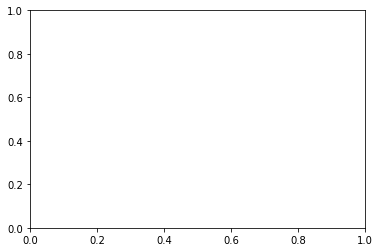

In [55]:
plt.scatter(x_train1,y_train1,color='red',marker = '+', label = 'DATA')
plt.plot(x_test1,y_pred_log,color = 'blue', label = 'PREDICTED')
plt.plot(x_test1,y_test1,color ='green', label = 'ACTUAL')
plt.title('AVG TEMP(LOGISTIC,16.6%)')
plt.xlabel('MONTH')
plt.ylabel('TEMP')
plt.figtext(.4, .5,"R^2 = 0.16")
plt.figtext(.4, .4,"RMSE = 21.8")
plt.legend()
plt.show()

In [54]:
from sklearn.metrics import mean_squared_error
print('MeanSquareError: %.2f',mean_squared_error(y_test1,y_pred_log))
print('R2 score: %.2f',reglogtemp.score(x_test,y_test1))

MeanSquareError: %.2f 48.666666666666664


NotFittedError: This LogisticRegression instance is not fitted yet

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test1,y_pred_log*2)

0.0

# RANDOM FOREST REGRESSOR

In [76]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rbr = RandomForestRegressor()
n_estimators = [1,5,10,50,100]
n_jobs = [1,-1]
min_samples_split = [2,3,4,10,20]
min_samples_leaf = [1,2,4,5,10]
parameter = {"n_estimators" : n_estimators, "n_jobs": n_jobs, "min_samples_leaf": min_samples_leaf,"min_samples_split": min_samples_split}
gs = GridSearchCV(rbr, parameter, scoring= 'r2', cv = 3)
gs.fit(x_train, y_train.ravel())
print(' Best Estimator :\n%s'%gs.best_estimator_)

 Best Estimator :
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


In [77]:
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         RandomForestRegressor(n_estimators=100))
hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                  'randomforestregressor__max_depth': [None, 5, 3, 1]}
clf = GridSearchCV(pipeline, hyperparameters, cv=2)
clf.fit(x_train, y_train.ravel())
print (clf.best_params_)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to f

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to f

{'randomforestregressor__max_depth': 3, 'randomforestregressor__max_features': 'log2'}


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to f

In [78]:
from sklearn.ensemble import RandomForestRegressor
rbr = RandomForestRegressor(n_estimators= 110, n_jobs =1,random_state = 42,max_features = 'auto', max_depth = 5)
rbr.fit(x_train,y_train.ravel())
y_pred_rbr = rbr.predict(x_test)

In [79]:
rbr.score(x_test,y_test)

0.9435316625735395

In [80]:
from sklearn.metrics import mean_squared_error
print('MeanSquareError: %.2f',mean_squared_error(y_test,y_pred_rbr))
print('R2 score: %.2f',rbr.score(x_test,y_test))

MeanSquareError: %.2f 1.775473261271232
R2 score: %.2f 0.9435316625735395


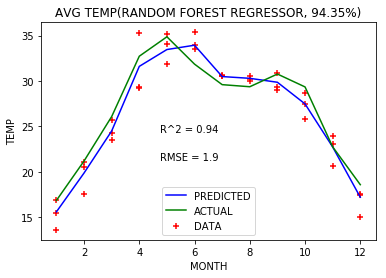

In [83]:
plt.scatter(x_train,y_train,color='red',marker = '+' , label = 'DATA')
plt.plot(x_test,y_pred_rbr,color = 'blue', label = 'PREDICTED')
plt.plot(x_test,y_test,color ='green', label = 'ACTUAL')
plt.title('AVG TEMP(RANDOM FOREST REGRESSOR, 94.35%)')
plt.xlabel('MONTH')
plt.ylabel('TEMP')
plt.figtext(.4, .5,"R^2 = 0.94")
plt.figtext(.4, .4,"RMSE = 1.9")
plt.legend()
plt.show()

In [82]:
import numpy as np
np.mean(((y_test-y_pred_rbr)**2/12)**0.5)

1.9076195652439418

# K-NN

In [87]:
from sklearn import neighbors
scores=[]
for i in range(1,36):
    knn= neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train1,y_train1)
    pred_i=knn.predict(x_test1)
    scores.append(np.mean(pred_i!=y_test1))
print(scores)

ValueError: could not convert string to float: 'Jan'

ValueError: x and y must have same first dimension, but have shapes (35,) and (0,)

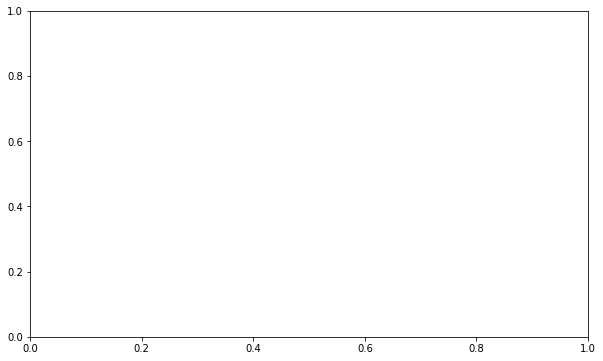

In [88]:
plt.figure(figsize=(10,6))
plt.plot(list(range(1,36)),scores,linestyle="-",lw=3,color="green")
plt.xlabel("K_values")
plt.ylabel("Accuracy Score")
plt.title("Elbow Chart ")

In [89]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train1,y_train1.ravel())
y_pred_knn = knn.predict(x_test1)

ValueError: could not convert string to float: 'Jan'

In [90]:
conf_level = knn.score(x_test1,y_test1)
print("Confidence level K-NN algorithm")
print(conf_level)

ValueError: could not convert string to float: 'Jan'

In [91]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test1,y_pred_knn)

NameError: name 'y_pred_knn' is not defined

In [92]:
from sklearn.metrics import mean_squared_error
print('MeanSquareError: %.2f',mean_squared_error(y_test1,y_pred_knn))
print('R2 score: %.2f',knn.score(x_test1,y_test1))

NameError: name 'y_pred_knn' is not defined

In [93]:
import numpy as np
np.mean(((y_test1-y_pred_knn)**2/12)**0.5)

NameError: name 'y_pred_knn' is not defined

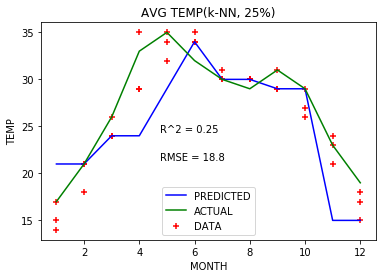

In [116]:
plt.scatter(x_train1,y_train1,color='red',marker = '+',label ='DATA')
plt.plot(x_test1,y_pred_knn,color = 'blue', label ='PREDICTED')
plt.plot(x_test1,y_test1,color ='green', label = 'ACTUAL')
plt.title('AVG TEMP(k-NN, 25%)')
plt.xlabel('MONTH')
plt.ylabel('TEMP')
plt.figtext(.4, .5,"R^2 = 0.25")
plt.figtext(.4, .4,"RMSE = 18.8")
plt.legend()
plt.show()

# ALL

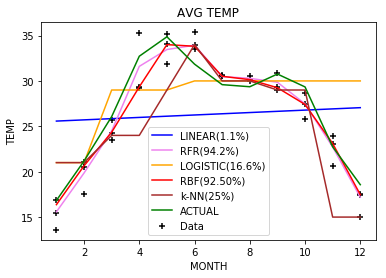

In [61]:
plt.scatter(x_train,y_train,color='black',marker = '+', label = 'Data')
plt.plot(x_test,y_predict,color = 'blue',label = 'LINEAR(1.1%)')
plt.plot(x_test,y_pred_rbr,color = 'violet', label = 'RFR(94.2%)')
plt.plot(x_test1,y_pred_log,color = 'orange', label = 'LOGISTIC(16.6%)')
plt.plot(x_test,y_pred_rbf,color = 'red',label = 'RBF(92.50%)')
plt.plot(x_test1,y_pred_knn,color = 'brown', label ='k-NN(25%)')
plt.plot(x_test,y_test,color ='green', label = 'ACTUAL')
plt.title('AVG TEMP')
plt.xlabel('MONTH')
plt.ylabel('TEMP')
plt.legend()
plt.show()